<a href="https://colab.research.google.com/github/andrewlee-29/Applied_Deep_Learning_2023Summer/blob/main/Week3%3Ahw(muti_class%2Csignal__label)_Otto_gdrive_kears.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OTTO Classification Competition Assignment


## Make a copy for yourself
Click "File" -> Save a Copy in Drive on Colab editor.

## Team members:
Name 1: Andrew Lee

Name 2:

Name 3:

## Submission
You need to subit your code to Kaggle to get a score and then upload your results to Brightspace.

Only one submission per team is needed.




## About the Company

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). We are selling millions of products worldwide every day, with several thousand products being added to our product line.

A consistent analysis of the performance of our products is crucial. However, due to our diverse global infrastructure, many identical products get classified differently. Therefore, the quality of our product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights we can generate about our product range.

<img src='https://storage.googleapis.com/kaggle-competitions/kaggle/4280/media/Grafik.jpg'>


From Kaggle:
https://www.kaggle.com/c/otto-group-product-classification-challenge/data?select=train.csv

## Data

Each row corresponds to a single product. There are a total of 93 numerical features, which represent counts of different events. All features have been obfuscated and will not be defined any further.

There are nine categories for all products. Each target category represents one of our most important product categories (like fashion, electronics, etc.). The products for the training and testing sets are selected randomly.

## Competition
Held in 2015 for $10,000 prize money. We can still submit!

Example solution:

https://www.kaggle.com/sachinsharma1123/otto-group-classification-acc-82

### **Download Data**

We made the competition files avaiable to you.

In [ ]:
#Files made public in class G Drive:
#get their link as viewer: https://drive.google.com/file/d/1-JlwRnCsQ17F3LCxlYg1u5b8GKA12Yc5/view?usp=sharing
!gdown --id 1-JlwRnCsQ17F3LCxlYg1u5b8GKA12Yc5 #train.csv
!gdown --id 1-DGMzegsuf9q1RVQID6SUfaHWoxmO1D5 #test.csv
!gdown --id 1-DhQHpxPknQStR_Y-VTQHnU7C2jlwBSD #sample_submission.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-JlwRnCsQ17F3LCxlYg1u5b8GKA12Yc5
To: /content/train.csv
100% 12.4M/12.4M [00:00<00:00, 34.5MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-DGMzegsuf9q1RVQID6SUfaHWoxmO1D5
To: /content/test.csv
100% 27.9M/27.9M [00:00<00:00, 30.5MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt


train_org = pd.read_csv("train.csv")
test_org = pd.read_csv("test.csv")
sample_org = pd.read_csv("sampleSubmission.csv")

train_org[-10:]

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
61868,61869,0,0,0,0,0,0,0,2,0,...,0,2,0,0,2,0,0,1,0,Class_9
61869,61870,0,0,0,0,0,0,0,2,0,...,0,3,2,0,0,0,0,1,0,Class_9
61870,61871,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61871,61872,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,Class_9
61872,61873,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Class_9
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9
61877,61878,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Class_9


In [ ]:
train_labels = train_org.target.values
train_labels[:-10]

array(['Class_1', 'Class_1', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype=object)

In [ ]:
np.unique(train_labels)

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [ ]:
#drop ids and labels
train = train_org.drop('id',axis = 1)
train = train.drop('target',axis = 1)
test = test_org.drop('id',axis = 1)

# convert labels to numeric values
lbl_enc = preprocessing.LabelEncoder()
labels = lbl_enc.fit_transform(train_labels)
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
train = train.astype("float32")
test = test.astype("float32")

print(train.shape, test.shape, train_labels.shape)

(61878, 93) (144368, 93) (61878,)


In [ ]:
train.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,...,0.070752,0.532305,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255769,3.474822,1.083340,...,1.151460,1.900438,2.681555,1.575455,2.115466,1.527385,4.597805,2.045645,0.982385,1.201720
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

## **Homework**

Copy and paste network from Workshop 2 below.

Update the output layer accordingly.

### **The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

keras.backend.clear_session()

# model = ?
model = keras.Sequential([
    layers.Dense(512, activation="relu"), #hidden layer(s)
    #vs dimishing gradients caused by sigmoids
    layers.Dense(9, activation="softmax") #SPECIAL: output layer
])

Add at least 1 hidden layer.

We can add more hidden Dense layers with varying number of neurons.

The "output layer" is problem specific. How many classes do we have to predict?

Since there are 9 classes in the output, the output=9


**The compilation step**

In [ ]:
# model.compile(?)
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", #regression: mse
              metrics=["accuracy"])

In [ ]:
# history = model.fit(?)
history = model.fit(train,labels,epochs=12,batch_size=1000)

Epoch 1/12
62/62 [==============================] - 2s 16ms/step - loss: 0.8510 - accuracy: 0.7195
Epoch 2/12
62/62 [==============================] - 1s 14ms/step - loss: 0.6348 - accuracy: 0.7669
Epoch 3/12
62/62 [==============================] - 1s 17ms/step - loss: 0.5931 - accuracy: 0.7794
Epoch 4/12
62/62 [==============================] - 1s 14ms/step - loss: 0.5663 - accuracy: 0.7861
Epoch 5/12
62/62 [==============================] - 1s 15ms/step - loss: 0.5463 - accuracy: 0.7924
Epoch 6/12
62/62 [==============================] - 1s 15ms/step - loss: 0.5319 - accuracy: 0.7955
Epoch 7/12
62/62 [==============================] - 1s 16ms/step - loss: 0.5148 - accuracy: 0.8023
Epoch 8/12
62/62 [==============================] - 1s 17ms/step - loss: 0.5030 - accuracy: 0.8051
Epoch 9/12
62/62 [==============================] - 1s 18ms/step - loss: 0.4921 - accuracy: 0.8089
Epoch 10/12
62/62 [==============================] - 1s 16ms/step - loss: 0.4807 - accuracy: 0.8119
Epoch 11/

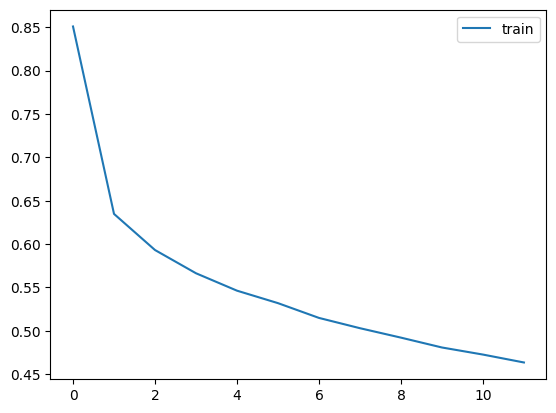

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.legend()

## Submission
You need to submit your code to Kaggle to get a score and then upload your results to Brightspace.


### Kaggle
**Create a submission for Kaggle**

The code below is to help you format your estimates to a submission friendly file. You shouldn't have to edit it.

Make sure that:
- your NN is named 'model'
- your test data is named 'test_sub'

In [ ]:
#submissions: rename variables if needed
test_sub = test
model = model

#Run model on test data
predictions = model.predict(test_sub)
predictions[0]

4512/4512 [==============================] - 5s 1ms/step


array([1.4486023e-05, 2.8878880e-01, 4.6538481e-01, 2.4443406e-01,
       2.1161311e-12, 2.7581996e-07, 1.3776250e-03, 7.2754518e-09,
       9.0727831e-10], dtype=float32)

In [ ]:
predictions[0].argmax()

2

In [ ]:
sub = pd.DataFrame(np.int32(predictions.round()))
sub

,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
144363,0,0,0,0,0,1,0,0,0
144364,0,0,1,0,0,0,0,0,0
144365,0,1,0,0,0,0,0,0,0
144366,0,1,0,0,0,0,0,0,0


In [ ]:
sub.columns = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9']
sub.insert(loc=0,column='id',value = test_org.id)
sub

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,1,0,0,0
2,3,0,0,0,0,0,1,0,0,0
3,4,0,1,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
144363,144364,0,0,0,0,0,1,0,0,0
144364,144365,0,0,1,0,0,0,0,0,0
144365,144366,0,1,0,0,0,0,0,0,0
144366,144367,0,1,0,0,0,0,0,0,0


In [ ]:
sub.to_csv("kaggle_otto_submission.csv",index=False)

Right click on this file and download it to your machine.

Go to: https://www.kaggle.com/c/otto-group-product-classification-challenge/leaderboard#score

Create an account and click "Late Submission" to score your work!

**Scoring:**

Kaggle will run your submission and rank your result.

You want a score less than 10; the closer to 0, the better!

### Brightspace (Graded)

In Colab window:
- Download your notebook: Click "File" -> Download - > Download .ipynb
- Print your notebook: Click "File" -> Print and then save a copy as PDF

Go to BrightSpace, upload:
- Notebook as .ipynb file,
- print out as a PDF,
- Screenshot of your score from Kaggle. Example:
<img src='https://drive.google.com/uc?id=1MPOU3J4rFTh8A2s6Tgq4038sXJwybgAp'>